In [16]:
import os

data_dir = os.path.join(os.curdir, 'data')

assert os.path.exists(data_dir)

# Exercise 4

## Task 1

In [17]:
import sqlite3

db_path = os.path.join(data_dir, 'sensor_readings.db')
assert os.path.exists(db_path)

### a)

In [18]:
conn = sqlite3.connect(db_path)

c = conn.cursor()

c

In [19]:
c.execute('PRAGMA table_info(sqlite_master)')

c.fetchall()

[(0, 'type', 'text', 0, None, 0),
 (1, 'name', 'text', 0, None, 0),
 (2, 'tbl_name', 'text', 0, None, 0),
 (3, 'rootpage', 'int', 0, None, 0),
 (4, 'sql', 'text', 0, None, 0)]

In [20]:
c.execute("SELECT * FROM sqlite_master")

query = c.fetchall()

all_tables = [row[1] for row in query]

all_tables

['measurements', 'sensors']

### b)

In [21]:
c.execute("PRAGMA table_info(sensors)")

c.fetchall()

[(0, 'sensorid', 'real', 0, None, 0),
 (1, 'sensor_type', 'text', 0, None, 0),
 (2, 'channel', 'text', 0, None, 0)]

In [22]:
c.execute("SELECT * FROM sensors")

c.fetchall()

[(0.0, 'Accelerometer', 'x'),
 (1.0, 'Accelerometer', 'y'),
 (2.0, 'Accelerometer', 'z'),
 (3.0, 'Gyroscope', 'x'),
 (4.0, 'Gyroscope', 'y'),
 (5.0, 'Gyroscope', 'z'),
 (6.0, 'Magnetometer', 'x'),
 (7.0, 'Magnetometer', 'y'),
 (8.0, 'Magnetometer', 'z'),
 (9.0, 'Gravity', 'x'),
 (10.0, 'Gravity', 'y'),
 (11.0, 'LinearAcceleration', 'x'),
 (12.0, 'LinearAcceleration', 'y'),
 (13.0, 'Gravity', 'z'),
 (14.0, 'RotationVector', 'x'),
 (15.0, 'LinearAcceleration', 'z'),
 (16.0, 'RotationVector', 'y'),
 (17.0, 'RotationVector', 'z'),
 (18.0, 'noise', 'decibels')]

### c)

In [23]:
import pandas  as pd

df_sensors = pd.read_sql_query("SELECT * from sensors", conn)
df_sensors

,sensorid,sensor_type,channel
0,0.0,Accelerometer,x
1,1.0,Accelerometer,y
2,2.0,Accelerometer,z
3,3.0,Gyroscope,x
4,4.0,Gyroscope,y
5,5.0,Gyroscope,z
6,6.0,Magnetometer,x
7,7.0,Magnetometer,y
8,8.0,Magnetometer,z
9,9.0,Gravity,x


In [24]:
df = pd.read_sql_query("SELECT * FROM measurements", conn)

df.head()

,sensorid,timestamp,data
0,0.0,1.556136e+09,-0.605637
1,1.0,1.556136e+09,1.623474
2,2.0,1.556136e+09,9.710114
3,3.0,1.556136e+09,0.002228
4,4.0,1.556136e+09,0.005508


In [25]:
df.groupby('sensorid').size().sort_values(ascending=False)

sensorid
0.0     1349
1.0     1340
2.0     1334
3.0     1334
4.0     1324
5.0     1313
6.0     1307
7.0     1302
8.0     1287
9.0     1282
10.0    1265
13.0    1187
11.0    1175
12.0    1139
15.0    1095
14.0    1055
18.0    1030
16.0    1006
17.0     949
dtype: int64

In [26]:
sensor_max = df.groupby('sensorid') \
               .size() \
               .sort_values(ascending=False) \
               .index[0]

print('The sensor with the most measurements is sensor {}'.format(sensor_max))

The sensor with the most measurements is sensor 0.0


In [27]:
acc_sensors = df_sensors[df_sensors['sensor_type'].str.contains('Acc')].index

acc_groups = df[df['sensorid'].isin(acc_sensors)].groupby('sensorid')

acc_groups['data'].max()

sensorid
0.0     15.428329
1.0      8.530746
2.0     56.121720
11.0     6.909350
12.0    13.980898
15.0    28.379932
Name: data, dtype: float64

In [28]:
acc_groups['data'].min()

sensorid
0.0     -6.830551
1.0     -9.574219
2.0    -19.585342
11.0    -7.031983
12.0   -11.810923
15.0   -21.138874
Name: data, dtype: float64

In [29]:
conn.close()

## Task 2

In [75]:
from tinydb import TinyDB, Query

json_path = os.path.join(data_dir, 'sensor_reports.json')

assert os.path.exists(json_path)

### a)

In [87]:
conn = TinyDB(json_path)

all_docs = conn.all()

all_docs[:5]

[{'type': 'report',
  'state': 'anomaly',
  'value': '-inf',
  'topic': 'aidae/1/noise/decibels',
  'timestamp': 1556136466.2272274},
 {'type': 'report',
  'state': 'high',
  'value': '41.267395',
  'topic': 'aidae/1/Magnetometer/y',
  'timestamp': 1556136541.499493},
 {'type': 'report',
  'state': 'high',
  'value': '43.380736999999996',
  'topic': 'aidae/1/Magnetometer/x',
  'timestamp': 1556136589.8646376},
 {'type': 'report',
  'state': 'high',
  'value': '56.121719999999996',
  'topic': 'aidae/1/Accelerometer/z',
  'timestamp': 1556136590.254276},
 {'type': 'report',
  'state': 'high',
  'value': '47.239684999999994',
  'topic': 'aidae/1/Magnetometer/z',
  'timestamp': 1556136594.54553}]

These are reports on the values of the sensor data in the sqlite db.

### b)

In [90]:
q = Query()

mag_z = conn.search(q.topic == 'aidae/1/Magnetometer/z')

mag_z

[{'type': 'report',
  'state': 'high',
  'value': '47.239684999999994',
  'topic': 'aidae/1/Magnetometer/z',
  'timestamp': 1556136594.54553},
 {'type': 'report',
  'state': 'high',
  'value': '48.85559',
  'topic': 'aidae/1/Magnetometer/z',
  'timestamp': 1556136601.8640122},
 {'type': 'report',
  'state': 'high',
  'value': '45.796203999999996',
  'topic': 'aidae/1/Magnetometer/z',
  'timestamp': 1556136623.4933126},
 {'type': 'report',
  'state': 'high',
  'value': '51.737976',
  'topic': 'aidae/1/Magnetometer/z',
  'timestamp': 1556136642.3971994}]

In [96]:
mag_z_anomalies = conn.search((q.topic == 'aidae/1/Magnetometer/z') & \
                              (q.state == 'anomaly'))
mag_z_warnings = conn.search((q.topic == 'aidae/1/Magnetometer/z') & \
                              (q.state == 'high'))

print(("For the magnetometer z sensor, there are {} anomalies and "
       "{} warnings for a high value").format(len(mag_z_anomalies),
                                             len(mag_z_warnings)))

For the magnetometer z sensor, there are 0 anomalies and 4 warnings for a high value


### c)

In [97]:
conn.search(q.state == 'anomaly')

[{'type': 'report',
  'state': 'anomaly',
  'value': '-inf',
  'topic': 'aidae/1/noise/decibels',
  'timestamp': 1556136466.2272274}]

It was caused by the -$\infty$ value.

In [73]:
conn.close()

## Task 3

In [1]:
import paho.mqtt.client as mqtt

### a)

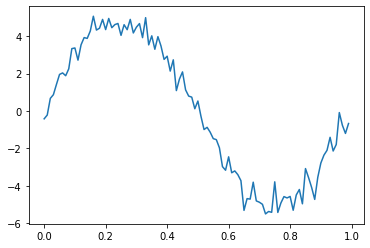

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SinSensor:
    def __init__(self, amplitude=5, variance=0.2):
        self.amplitude = amplitude
        self.variance = variance

    def get_measurement(self, t):
        clean_signal = np.sin(t * 2 * np.pi) * self.amplitude
        noisy_signal = np.random.normal(clean_signal, np.sqrt(self.variance))
        return noisy_signal
    
s = SinSensor()

values = list()
time = np.arange(0, 1, 0.01)
for t in time:
    values.append(s.get_measurement(t))

plt.plot(time, values)
plt.show()

### b)

In [3]:
# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("$SYS/#")

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print('MSG: '+msg.topic+" "+str(msg.payload))

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("broker.hivemq.com")

client

In [4]:
from threading import Timer
import time

class PublishTimer():
   def __init__(self, interval, publish_function):
      self.interval = interval
      self.publish_function = publish_function
      self.thread = Timer(self.interval, self.handle_function)

   def handle_function(self):
      self.publish_function()
      self.thread = Timer(self.interval, self.handle_function)
      self.thread.start()

   def start(self):
      self.thread.start()

   def cancel(self):
      self.thread.cancel()

def get_sensor_publish(client, sensor, topic):
    def publish():
        return client.publish(
            topic=topic,
            payload=sensor.get_measurement(time.time()))

    return publish

topic = 'aidae/123456/SinSensor'

In [5]:
client.loop_start()

publisher = PublishTimer(0.2, get_sensor_publish(client, SinSensor(), topic))
publisher.start()

Connected with result code 0
MSG: $SYS/broker/connection/raspberrypi.hivemq/state b'0'
MSG: $SYS/broker/connection/566522NN.dfnalkfalkghalgnalgknalvjksfsjkl/state b'0'
MSG: $SYS/broker/connection/fhem1.local.hivemqbridge02/state b'0'
MSG: $SYS/broker/connection/gobrain.broker-hivemq-com/state b'0'
MSG: $SYS/broker/connection/hyperion.bridge01/state b'0'


### c)

In [6]:
client.subscribe(topic)

(0, 14)

MSG: aidae/123456/SinSensor b'4.8654803612852495'
MSG: aidae/123456/SinSensor b'3.090072614430188'
MSG: aidae/123456/SinSensor b'-2.327031271589695'
MSG: aidae/123456/SinSensor b'-4.936922241067779'
MSG: aidae/123456/SinSensor b'-0.6712020184869315'
MSG: aidae/123456/SinSensor b'3.7615254539168355'
MSG: aidae/123456/SinSensor b'2.988089172222725'
MSG: aidae/123456/SinSensor b'-2.770775695170656'
MSG: $SYS/broker/connection/gobrain.broker-hivemq-com/state b'0'
MSG: aidae/123456/SinSensor b'-5.294888540466159'


In [7]:
publisher.cancel()
client.unsubscribe(topic)
client.loop_stop()

MSG: aidae/123456/SinSensor b'0.33434993264552165'


### d)

In [11]:
# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print('MSG: '+msg.topic+" "+str(msg.payload))

sensor_payloads = list()
def on_message_store(client, userdata, msg):
    if msg.topic == topic:
        sensor_payloads.append(msg.payload)

    on_message(client, userdata, msg)
    
client.on_message = on_message_store

client.loop_start()

time.sleep(1)

publisher = PublishTimer(0.2, get_sensor_publish(client, SinSensor(), topic))
publisher.start()

client.subscribe(topic)

MSG: $SYS/broker/connection/fhem1.local.hivemqbridge02/state b'0'
MSG: $SYS/broker/connection/gobrain.broker-hivemq-com/state b'0'


(0, 74)

MSG: aidae/123456/SinSensor b'3.673284548595732'
MSG: aidae/123456/SinSensor b'4.869239699747763'
MSG: aidae/123456/SinSensor b'-2.1385842647705635'
MSG: aidae/123456/SinSensor b'-5.026453323558153'
MSG: aidae/123456/SinSensor b'-0.9507749156081562'
MSG: aidae/123456/SinSensor b'4.222213332427871'
MSG: aidae/123456/SinSensor b'3.5981894415857267'
MSG: aidae/123456/SinSensor b'-2.125061265476417'
MSG: aidae/123456/SinSensor b'-4.780097196887363'
MSG: aidae/123456/SinSensor b'-0.8166698902128047'
MSG: aidae/123456/SinSensor b'4.328595627816596'
MSG: aidae/123456/SinSensor b'4.183003541990516'
MSG: $SYS/broker/connection/fhem1.local.hivemqbridge02/state b'0'
MSG: aidae/123456/SinSensor b'-2.469365844834252'
MSG: aidae/123456/SinSensor b'-3.81763453781935'
MSG: aidae/123456/SinSensor b'-0.6546795375013457'
MSG: aidae/123456/SinSensor b'4.909057467772923'
MSG: aidae/123456/SinSensor b'3.455731076484719'
MSG: aidae/123456/SinSensor b'-2.2037045820391272'
MSG: $SYS/broker/connection/gobrain.b

In [12]:
publisher.cancel()
client.unsubscribe(topic)
client.loop_stop()

MSG: aidae/123456/SinSensor b'5.11827630547437'


In [8]:
payloads = list()
class AcquisitionTimer():
    def __init__(self, length, client, topic, publisher):
        self.length = length
        self.client = client
        self.topic = topic
        self.publisher = publisher

        curr_on_message = client.on_message
        def on_message_store(client, userdata, msg):
            if msg.topic == topic:
                payloads.append(msg.payload)

            curr_on_message(client, userdata, msg)

        self.client.on_message = on_message_store
        
        self.stop_thread = Timer(self.length, self._cancel)
    
    def start(self):
        self.client.loop_start()

        self.publisher.start()

        self.client.subscribe(self.topic)
        
        self.stop_thread.start()
        
    def cancel(self):
        self.stop_thread.cancel()
        self._cancel()

    def _cancel(self):
        self.publisher.cancel()
        self.client.unsubscribe(self.topic)
        self.client.loop_stop()
        print('Over!')

acq = AcquisitionTimer(60, client, topic, PublishTimer(0.2, get_sensor_publish(client, SinSensor(), topic)))
acq.start()

MSG: $SYS/broker/connection/fhem1.local.hivemqbridge02/state b'0'
MSG: $SYS/broker/connection/gobrain.broker-hivemq-com/state b'0'
MSG: $SYS/broker/connection/fhem1.local.hivemqbridge02/state b'0'
MSG: aidae/123456/SinSensor b'-0.29390087963237255'
MSG: aidae/123456/SinSensor b'-5.511143923367505'
MSG: aidae/123456/SinSensor b'-2.234135974063564'
MSG: aidae/123456/SinSensor b'3.593571059582417'
MSG: aidae/123456/SinSensor b'4.59541972071764'
MSG: $SYS/broker/connection/fhem1.local.hivemqbridge02/state b'0'
MSG: aidae/123456/SinSensor b'-0.8513746717617092'
MSG: $SYS/broker/connection/gobrain.broker-hivemq-com/state b'0'
MSG: aidae/123456/SinSensor b'-4.557018872604045'
MSG: aidae/123456/SinSensor b'-1.3911118010542785'
MSG: aidae/123456/SinSensor b'2.32087036110501'
MSG: aidae/123456/SinSensor b'4.433068691623704'
MSG: aidae/123456/SinSensor b'0.10965820374293433'
MSG: aidae/123456/SinSensor b'-4.29968689102441'
MSG: aidae/123456/SinSensor b'-3.32116535155615'
MSG: aidae/123456/SinSens

MSG: aidae/123456/SinSensor b'2.6407172437840725'
MSG: aidae/123456/SinSensor b'5.059980351872968'
MSG: aidae/123456/SinSensor b'0.08301257704204751'
MSG: aidae/123456/SinSensor b'-5.0974365543365945'
MSG: aidae/123456/SinSensor b'-3.4681165954103355'
MSG: aidae/123456/SinSensor b'3.25198254023815'
MSG: aidae/123456/SinSensor b'4.70372371598916'
MSG: $SYS/broker/connection/fhem1.local.hivemqbridge02/state b'0'
MSG: aidae/123456/SinSensor b'0.23368765579029507'
MSG: aidae/123456/SinSensor b'-4.956001680955503'
MSG: aidae/123456/SinSensor b'-2.53774690546089'
MSG: aidae/123456/SinSensor b'2.4192364194508174'
MSG: aidae/123456/SinSensor b'4.285606016923127'
MSG: aidae/123456/SinSensor b'-0.11277942324041382'
MSG: aidae/123456/SinSensor b'-4.488850640555201'
MSG: aidae/123456/SinSensor b'-3.120334437693564'
MSG: aidae/123456/SinSensor b'3.111279168106873'
MSG: aidae/123456/SinSensor b'4.778464644096858'
MSG: aidae/123456/SinSensor b'-0.057693670986948324'
MSG: aidae/123456/SinSensor b'-5.1

Over!


In [55]:
acq.cancel()

MSG: aidae/123456/SinSensor b'-5.095418896653654'
MSG: aidae/123456/SinSensor b'-5.041254148320705'
Over!


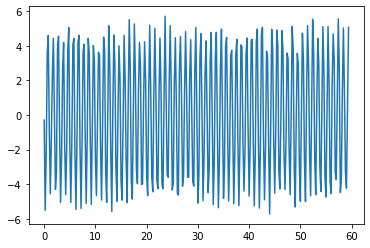

In [61]:
time_index = np.linspace(0, len(payloads)*0.2, len(payloads), endpoint=False)

sensor_data = [float(payload) for payload in payloads]

data = pd.Series(sensor_data, index=time_index)

data.plot()
plt.show()

In [34]:
client.disconnect()

0

## Task 1 (continuation)

### d) and e)

In [35]:
conn = sqlite3.connect(db_path)

c = conn.cursor()

c

In [37]:
c.execute("PRAGMA table_info(sensors)")

c.fetchall()

[(0, 'sensorid', 'real', 0, None, 0),
 (1, 'sensor_type', 'text', 0, None, 0),
 (2, 'channel', 'text', 0, None, 0)]

In [54]:
# ensures sensorid will be unique
c.execute("CREATE UNIQUE INDEX sensoridx ON sensors(sensorid)")

conn.commit()

In [49]:
c.execute("SELECT * FROM sensors")

c.fetchall()

[(0.0, 'Accelerometer', 'x'),
 (1.0, 'Accelerometer', 'y'),
 (2.0, 'Accelerometer', 'z'),
 (3.0, 'Gyroscope', 'x'),
 (4.0, 'Gyroscope', 'y'),
 (5.0, 'Gyroscope', 'z'),
 (6.0, 'Magnetometer', 'x'),
 (7.0, 'Magnetometer', 'y'),
 (8.0, 'Magnetometer', 'z'),
 (9.0, 'Gravity', 'x'),
 (10.0, 'Gravity', 'y'),
 (11.0, 'LinearAcceleration', 'x'),
 (12.0, 'LinearAcceleration', 'y'),
 (13.0, 'Gravity', 'z'),
 (14.0, 'RotationVector', 'x'),
 (15.0, 'LinearAcceleration', 'z'),
 (16.0, 'RotationVector', 'y'),
 (17.0, 'RotationVector', 'z'),
 (18.0, 'noise', 'decibels')]

In [51]:
c.execute("REPLACE INTO sensors VALUES (19.0, 'SimulatedSensor', 'value')")

conn.commit()

c.execute("SELECT * FROM sensors")

c.fetchall()

[(0.0, 'Accelerometer', 'x'),
 (1.0, 'Accelerometer', 'y'),
 (2.0, 'Accelerometer', 'z'),
 (3.0, 'Gyroscope', 'x'),
 (4.0, 'Gyroscope', 'y'),
 (5.0, 'Gyroscope', 'z'),
 (6.0, 'Magnetometer', 'x'),
 (7.0, 'Magnetometer', 'y'),
 (8.0, 'Magnetometer', 'z'),
 (9.0, 'Gravity', 'x'),
 (10.0, 'Gravity', 'y'),
 (11.0, 'LinearAcceleration', 'x'),
 (12.0, 'LinearAcceleration', 'y'),
 (13.0, 'Gravity', 'z'),
 (14.0, 'RotationVector', 'x'),
 (15.0, 'LinearAcceleration', 'z'),
 (16.0, 'RotationVector', 'y'),
 (17.0, 'RotationVector', 'z'),
 (18.0, 'noise', 'decibels'),
 (19.0, 'SimulatedSensor', 'value')]

In [55]:
c.execute("PRAGMA table_info(measurements)")

c.fetchall()

[(0, 'sensorid', 'real', 0, None, 0),
 (1, 'timestamp', 'real', 0, None, 0),
 (2, 'data', 'real', 0, None, 0)]

Skipped the insertion of 200 data points.

In [67]:
df_data = pd.DataFrame(data)

# so it fits the `timestamp` columns of the DB
df_data.index = data.index + time.time()

df_data = df_data.reset_index()

df_data = df_data.rename({0: 'data', 'index': 'timestamp'}, axis='columns')

df_data['sensorid'] = 19.0

df_data.head()

,timestamp,data,sensorid
0,1.590141e+09,-0.293901,19.0
1,1.590141e+09,-5.511144,19.0
2,1.590141e+09,-2.234136,19.0
3,1.590141e+09,3.593571,19.0
4,1.590141e+09,4.595420,19.0


In [71]:
df_data.to_sql(name='measurements', con=conn, if_exists='append', index=False)

c.execute("SELECT * FROM measurements")

c.fetchall()[-100:]

[(19.0, 1590141188.7267096, 4.453159719834179),
 (19.0, 1590141188.9267097, -0.8889483249074756),
 (19.0, 1590141189.1267097, -4.689271220396179),
 (19.0, 1590141189.3267097, -1.7642385928999234),
 (19.0, 1590141189.5267098, 4.26913142162146),
 (19.0, 1590141189.7267096, 4.373130479588445),
 (19.0, 1590141189.9267097, -1.3309758890242687),
 (19.0, 1590141190.1267097, -5.2557530939271135),
 (19.0, 1590141190.3267097, -2.327865073625892),
 (19.0, 1590141190.5267098, 4.212903912711318),
 (19.0, 1590141190.7267096, 4.967703691962171),
 (19.0, 1590141190.9267097, -1.3111243563101798),
 (19.0, 1590141191.1267097, -5.384306099519253),
 (19.0, 1590141191.3267097, -1.8540286832415824),
 (19.0, 1590141191.5267098, 4.604222201313444),
 (19.0, 1590141191.7267096, 5.067895115540413),
 (19.0, 1590141191.9267097, -1.2578409970674818),
 (19.0, 1590141192.1267097, -4.903103089043157),
 (19.0, 1590141192.3267097, -1.8839039742821342),
 (19.0, 1590141192.5267098, 3.6958576150336464),
 (19.0, 1590141192.7

In [72]:
conn.close()

## Task 2 (continuation)

### d)

In [82]:
conn = TinyDB(json_path)

all_docs = conn.all()

len(all_docs)

33

In [83]:
all_docs[-5:]

[{'type': 'sensor', 'sensor_type': 'RotationVector', 'channel': 'x'},
 {'type': 'sensor', 'sensor_type': 'LinearAcceleration', 'channel': 'z'},
 {'type': 'sensor', 'sensor_type': 'RotationVector', 'channel': 'y'},
 {'type': 'sensor', 'sensor_type': 'RotationVector', 'channel': 'z'},
 {'type': 'sensor', 'sensor_type': 'noise', 'channel': 'decibels'}]

In [88]:
df_reports = df_data[df_data['data'] > 5]

reports = df_reports.to_dict('records')

reports

[{'timestamp': 1590141153.9267097,
  'data': 5.054574574825693,
  'sensorid': 19.0},
 {'timestamp': 1590141161.7267096,
  'data': 5.158016101967373,
  'sensorid': 19.0},
 {'timestamp': 1590141165.7267096,
  'data': 5.513021690340742,
  'sensorid': 19.0},
 {'timestamp': 1590141166.7267096, 'data': 5.26132063513978, 'sensorid': 19.0},
 {'timestamp': 1590141169.7267096,
  'data': 5.191365017697662,
  'sensorid': 19.0},
 {'timestamp': 1590141170.7267096,
  'data': 5.013968603203073,
  'sensorid': 19.0},
 {'timestamp': 1590141172.7267096,
  'data': 5.710252490195436,
  'sensorid': 19.0},
 {'timestamp': 1590141173.7267096,
  'data': 5.163336182842284,
  'sensorid': 19.0},
 {'timestamp': 1590141178.7267096,
  'data': 5.059980351872968,
  'sensorid': 19.0},
 {'timestamp': 1590141191.7267096,
  'data': 5.067895115540413,
  'sensorid': 19.0},
 {'timestamp': 1590141197.5267098,
  'data': 5.1213412694354234,
  'sensorid': 19.0},
 {'timestamp': 1590141200.5267098,
  'data': 5.161214164610974,
  'se

In [89]:
reports = [{
    'type': 'report',
    'state': 'high-threshold',
    'value': r['data'],
    'topic': topic,
    'timestamp': r['timestamp']
} for r in reports]

reports

[{'type': 'report',
  'state': 'high-threshold',
  'value': 5.054574574825693,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141153.9267097},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.158016101967373,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141161.7267096},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.513021690340742,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141165.7267096},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.26132063513978,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141166.7267096},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.191365017697662,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141169.7267096},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.013968603203073,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141170.7267096},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.710252490195436,
  'topic':

In [90]:
for report in reports:
    conn.insert(report)

all_docs = conn.all()

len(all_docs)

51

In [91]:
all_docs[-5:]

[{'type': 'report',
  'state': 'high-threshold',
  'value': 5.107602990004159,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141203.5267098},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.112680282165407,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141204.5267098},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.561133297231262,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141206.5267098},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.032898531812636,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141207.5267098},
 {'type': 'report',
  'state': 'high-threshold',
  'value': 5.075293821276331,
  'topic': 'aidae/123456/SinSensor',
  'timestamp': 1590141208.5267098}]

In [92]:
conn.close()